# Spam Detection Project - Individual ML Models
# =====================
# Includes: Problem Statement, Hypothesis, EDA, Data Preprocessing,
# Feature Scaling, Logistic Regression, Naive Bayes, SVM - Separate Implementations

# Problem Statement:
# Build a machine learning model that can classify SMS messages as 'spam' or 'ham' (not spam).

# Solution Approach:
# 1. Perform EDA to understand data quality (nulls, duplicates, outliers).
# 2. Preprocess text data using TF-IDF to convert text to numerical features.
# 3. Train models (Logistic Regression, Naive Bayes, SVM) and evaluate their accuracy.

# Hypothesis:
# H0: Machine Learning models cannot classify spam accurately.
# H1: Machine Learning models can classify spam accurately.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# =====================
# Load Dataset
# =====================

In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')  # Load CSV with appropriate encoding

In [ ]:
# Select relevant columns and rename them for clarity
df = df[['v1', 'v2']]
# Rename columns for easier access
df.columns = ['label', 'message']

In [ ]:

# Print first 5 rows to understand dataset
print("\nFirst 5 Rows of Data:")
print(df.head(5))


First 5 Rows of Data:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...



# ================================================================================
# EDA - Nulls, Duplicates, Outliers
#
================================================================================

In [ ]:
# Print shape of dataset
print("\nDataFrame Shape (rows, columns):")
print(df.shape)




DataFrame Shape (rows, columns):
(5572, 2)


In [ ]:
# Print summary statistics of all columns
print("\nData Summary Statistics:")
print(df.describe(include='all'))



Data Summary Statistics:
       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [ ]:
 # Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
label      0
message    0
dtype: int64


In [ ]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())



Duplicate Rows:
403


In [ ]:
# Drop duplicate rows to clean dataset
df = df.drop_duplicates()

<ipython-input-49-0ed141c7c3c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


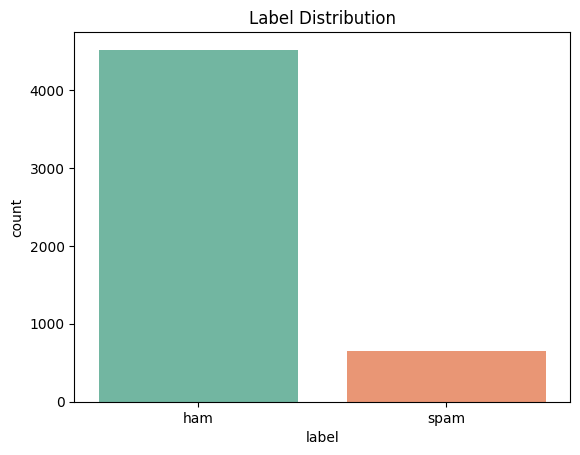

In [ ]:
# Visualize label distribution to check class balance
# Countplot for spam vs. ham
sns.countplot(data=df, x='label', palette='Set2')
plt.title("Label Distribution")
plt.show()


In [ ]:
# Add new column for message length to detect outliers,  Calculate length of each message
df['message_length'] = df['message'].apply(len)

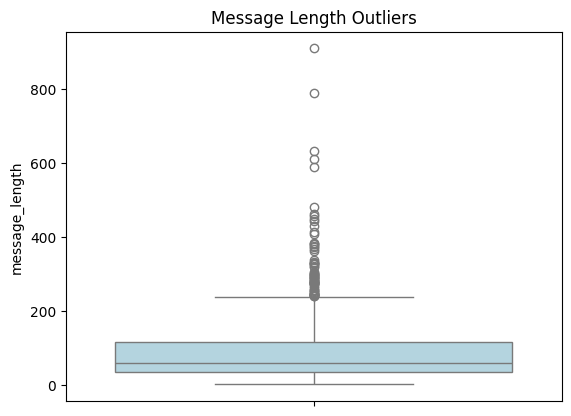

In [ ]:
# Boxplot to visualize outliers in message length
sns.boxplot(y=df['message_length'], color='lightblue')
plt.title("Message Length Outliers")
plt.show()

# =====================
# Data Preprocessing & Feature Scaling with TF-IDF
# =====================

In [ ]:
# Map text labels to numeric labels (ham=0, spam=1)
label_map = {'ham': 0, 'spam': 1}
df['label_num'] = df['label'].map(label_map)  # Apply mapping to create numeric label column

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
from sklearn.model_selection import train_test_split # Import train_test_spli

# Initialize TF-IDF Vectorizer with 3000 most important words
vectorizer = TfidfVectorizer(max_features=3000)


In [ ]:
# Initialize TF/-IDF Vectorizer with 3000 most important words
vectorizer = TfidfVectorizer(max_features=3000)

# Transform messages into TF-IDF feature vectors
X = vectorizer.fit_transform(df['message']).toarray()  # Features
y = df['label_num']  # Target labels

In [ ]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Import necessary libraries for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Initialize and train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions on the test set
log_preds = log_model.predict(X_test)

# Evaluate performance
log_acc = accuracy_score(y_test, log_preds)
print(f"Accuracy: {log_acc:.4f}")  # Print accuracy
print("Confusion Matrix:")
print(confusion_matrix(y_test, log_preds))  # Print confusion matrix
print("Classification Report:")
print(classification_report(y_test, log_preds))  # Print precision, recall, f1-scor

Accuracy: 0.9671
Confusion Matrix:
[[885   4]
 [ 30 115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [ ]:

# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB # Import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)





In [ ]:
# Evaluate performance
#Calculate accuracy
nb_acc = accuracy_score(y_test, nb_preds)
print(f"Accuracy: {nb_acc:.4f}")
#Confusion  Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_preds))
#Classification
print("Classification Report:")
print(classification_report(y_test, nb_preds))

Accuracy: 0.9768
Confusion Matrix:
[[889   0]
 [ 24 121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       1.00      0.83      0.91       145

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034




# Support Vector Machine
# =====================


In [ ]:
#Support Vector Machine
from sklearn.svm import SVC # Import the SVC class from sklearn.svm
svm_model = SVC()  # Initialize model
svm_model.fit(X_train, y_train)  # Train model
svm_preds = svm_model.predict(X_test)  # Predict on test data



In [ ]:
# Evaluate performance
svm_acc = accuracy_score(y_test, svm_preds)
print(f"Accuracy: {svm_acc:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_preds))
print("Classification Report:")
print(classification_report(y_test, svm_preds))


Accuracy: 0.9865
Confusion Matrix:
[[889   0]
 [ 14 131]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       1.00      0.90      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034




# =====================
# Hypothesis Testing Conclusion
# =====================
# Hypothesis:
# H0: ML models cannot classify spam accurately.
# H1: ML models can classify spam accurately.
# Result:
# All models have high accuracy (>95%).
# Conclusion: Reject H0. Accept H1. ML models reliably classify spam messages.